<a href="https://colab.research.google.com/github/decibone/PraktikumMLB1/blob/main/Tugas1_Laurentius_Lucky_PMB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Laurentius Lucky Andriawan Bagaskara

NIM: 24060122130100

Nama Dataset: Wine Dataset

Link Dataset: https://archive.ics.uci.edu/dataset/109/wine

1. Explorasi algoritm klasifikasi lain pada dataset Iris

Menggunakan algoritma Decision Tree & Random Forest

In [ ]:
import pandas

In [ ]:
## Load dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width',  'petal-length',  'petal-width', 'class']

dataset = pandas.read_csv(url, names=names)

In [ ]:
## Siapkan data
from sklearn.model_selection import train_test_split
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7

##Split dataset
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [ ]:
##Set up metrik evaluasi
scoring = 'accuracy'

In [ ]:
##Import semua yang dibutuhkan
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Definisikan model yang dipakai, dalam hal ini Decision Tree dan Random Forest
models = [
    ('Decision Tree', DecisionTreeClassifier(random_state=seed)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=seed))
]

## Eavluasi menggunakan setiap model
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (±%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Decision Tree: 0.950 (±0.076)
Random Forest: 0.967 (±0.041)


Random forest lebih efektif, uji keakuratan random forest terhadap data yang ada


---



In [ ]:
from sklearn.metrics import accuracy_score  # Import accuracy_score
from sklearn.metrics import confusion_matrix # Import confusion_matrix
from sklearn.metrics import classification_report # Import classification_report

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=seed,
    max_depth=None,  # Tidak ada kedalaman maksimal
    min_samples_split=2,  # Default
    min_samples_leaf=1    # Default
)
rf.fit(X_train, Y_train)

predictions = rf.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8666666666666667
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30



Uji keakuratan decision tree pada data yang ada

In [ ]:
from sklearn.metrics import accuracy_score  # Import accuracy_score
from sklearn.metrics import confusion_matrix # Import confusion_matrix
from sklearn.metrics import classification_report # Import classification_report

dt = DecisionTreeClassifier(
    random_state=seed,
    criterion='gini',
    max_depth=None,    # tidak ada kedalaman maksimal
    min_samples_split=2,
    min_samples_leaf=1
)
dt.fit(X_train, Y_train)

predictions = dt.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 10  2]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.91      0.83      0.87        12
 Iris-virginica       0.83      0.91      0.87        11

       accuracy                           0.90        30
      macro avg       0.91      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



2. Cari dataset lain dari repository UCI Machine Learning
- lakukan keenam langkah untuk menampilkan summary dataset pada modul 1
- ⁠kemudian buat evaluasi algoritma dengan menggunakan 3 model yaitu KNN, NB, dan SVM


In [ ]:
import pandas

In [ ]:
## Load dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
names = ['class', 'Alcohol',  'Malicacid',  'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', '0D280_0D315_of_diluted_wines', 'Proline']

dataset_wine = pandas.read_csv(url, names=names)

- Print dimensi dataset

In [ ]:
print(dataset_wine.shape)

(178, 14)


- Print 20 head pertama


In [ ]:
print(dataset_wine.head(20))

    class  Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  \
0       1    14.23       1.71  2.43               15.6        127   
1       1    13.20       1.78  2.14               11.2        100   
2       1    13.16       2.36  2.67               18.6        101   
3       1    14.37       1.95  2.50               16.8        113   
4       1    13.24       2.59  2.87               21.0        118   
5       1    14.20       1.76  2.45               15.2        112   
6       1    14.39       1.87  2.45               14.6         96   
7       1    14.06       2.15  2.61               17.6        121   
8       1    14.83       1.64  2.17               14.0         97   
9       1    13.86       1.35  2.27               16.0         98   
10      1    14.10       2.16  2.30               18.0        105   
11      1    14.12       1.48  2.32               16.8         95   
12      1    13.75       1.73  2.41               16.0         89   
13      1    14.75       1.73  2.3

- Print distribusi kelas data

In [ ]:
print(dataset_wine.groupby('class').size())

class
1    59
2    71
3    48
dtype: int64


- Print Ringkasan Statistik

In [ ]:
print(dataset_wine.describe())

            class     Alcohol   Malicacid         Ash  Alcalinity_of_ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total_phenols  Flavanoids  Nonflavanoid_phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000   

- Visualisasi plot univariat

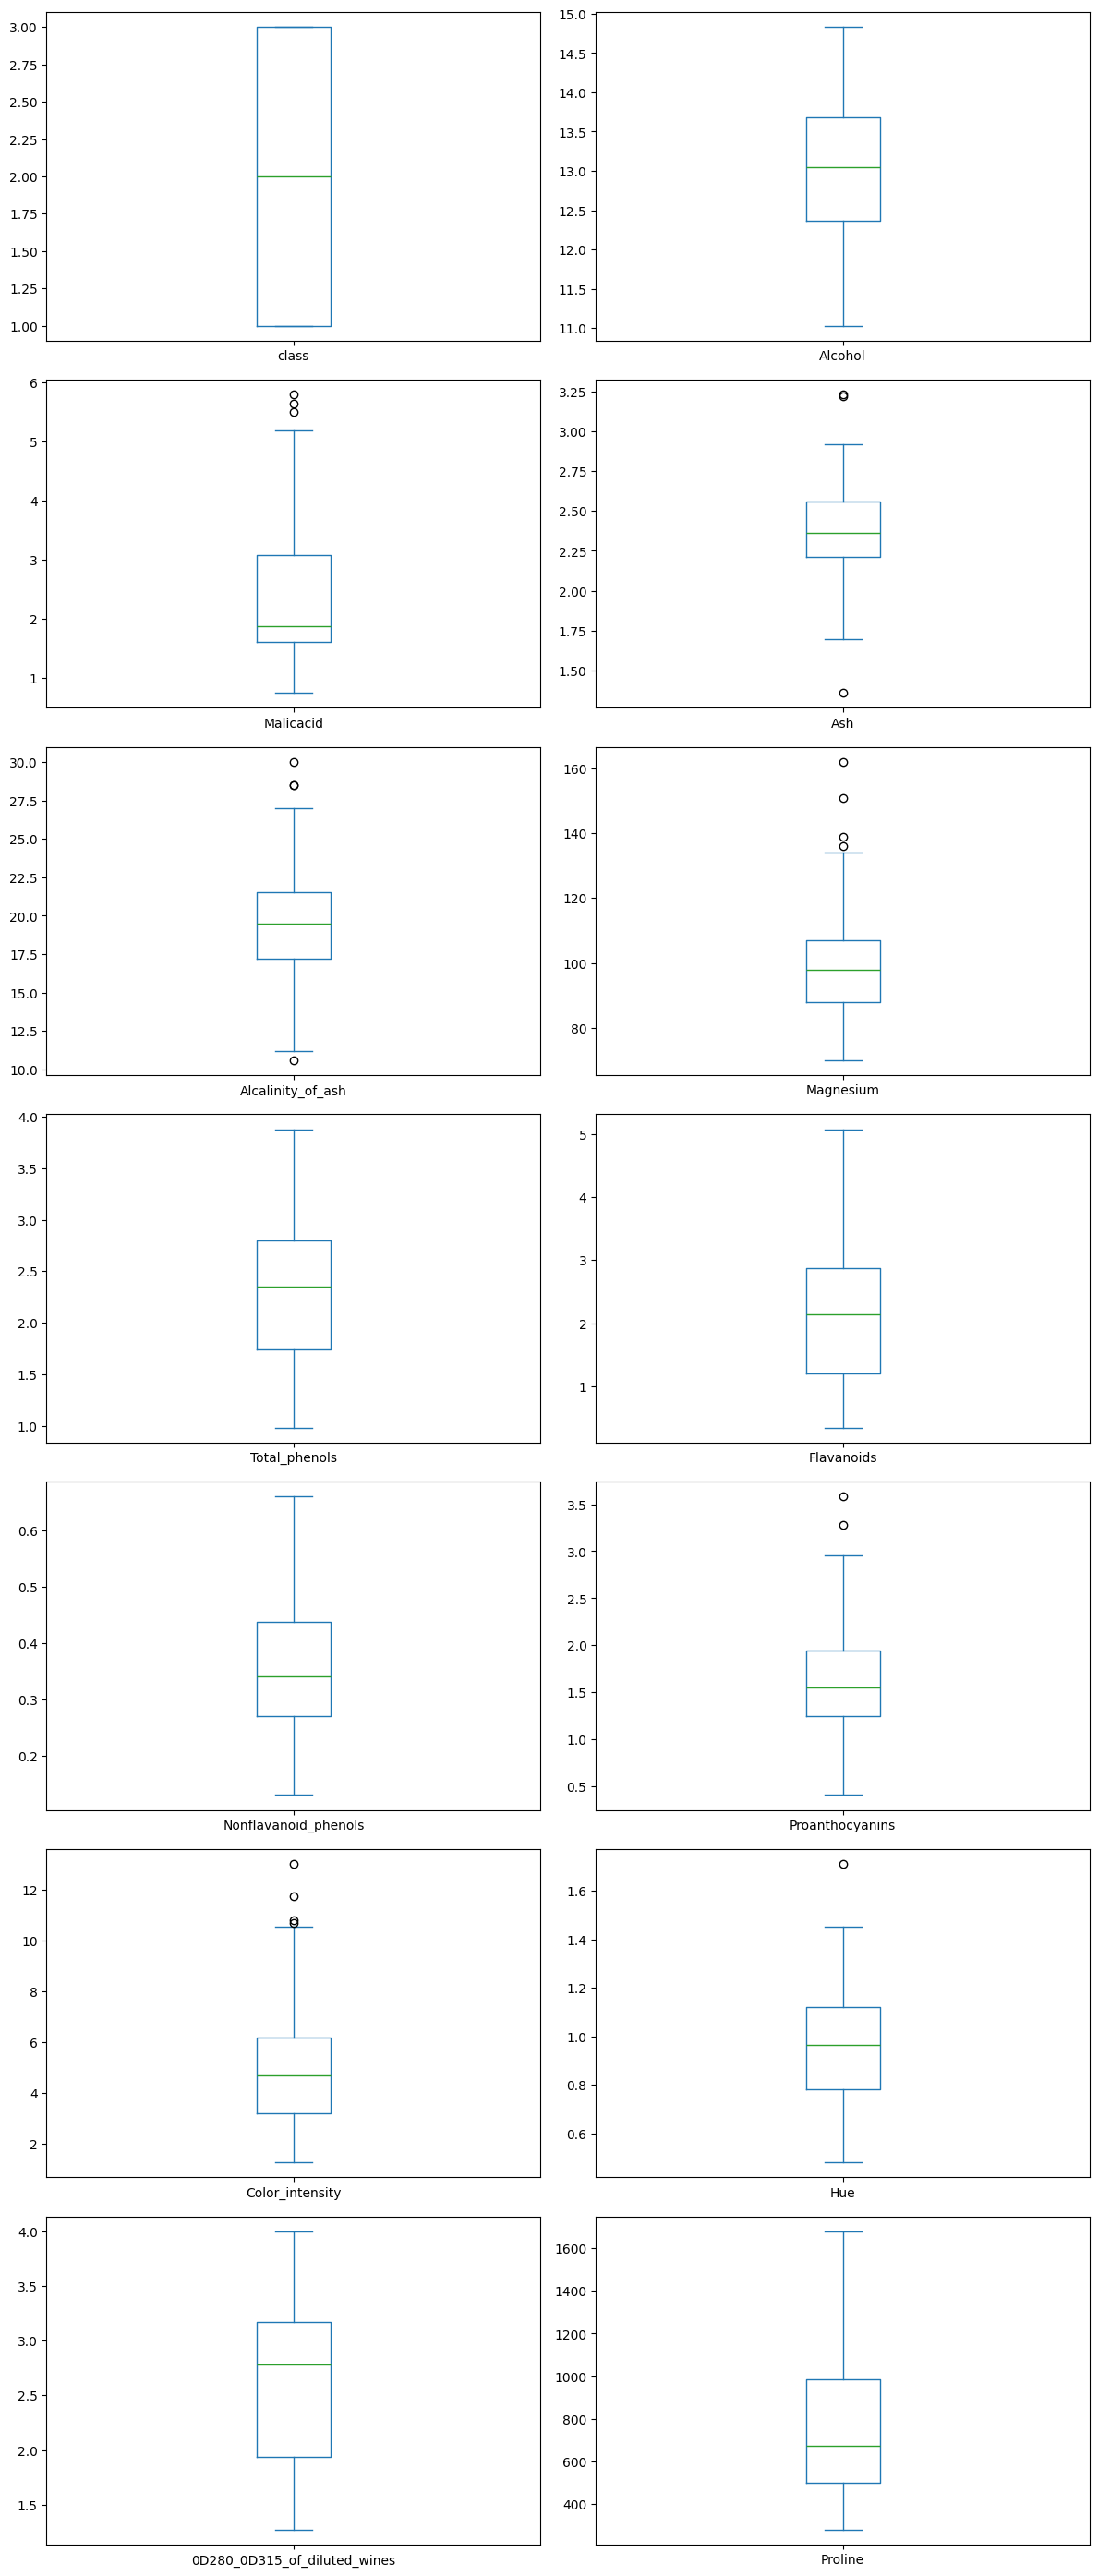

In [ ]:
import matplotlib.pyplot as plt

# hitng jumlah baris dan kolom yang diperlukan
num_cols = dataset_wine.shape[1] -1  # kurangi dengan 1 untuk kolom kelas
num_rows = (num_cols + 1) // 2 # Hitung barisnya (minimal 2)

#  Update layout agar bisa mengakomodasi semua kolom
dataset.plot(kind='box', subplots=True, layout=(num_rows, 2),
            sharex=False, sharey=False, figsize=(12, num_rows * 4)) #atur figsize
plt.tight_layout()  # atur subplot
plt.show()

- Histogram

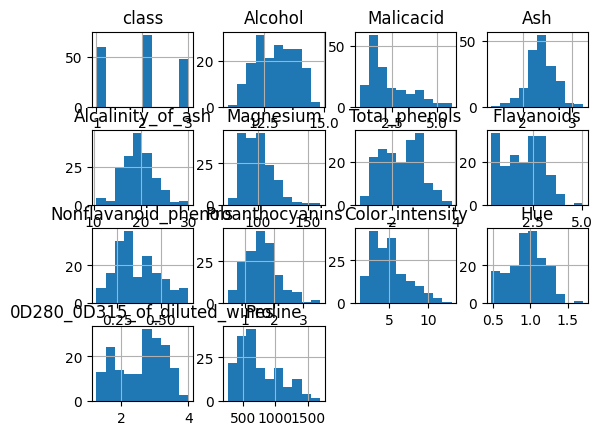

In [ ]:
dataset_wine.hist()
plt.show()

- Visualisasi plot multivariat


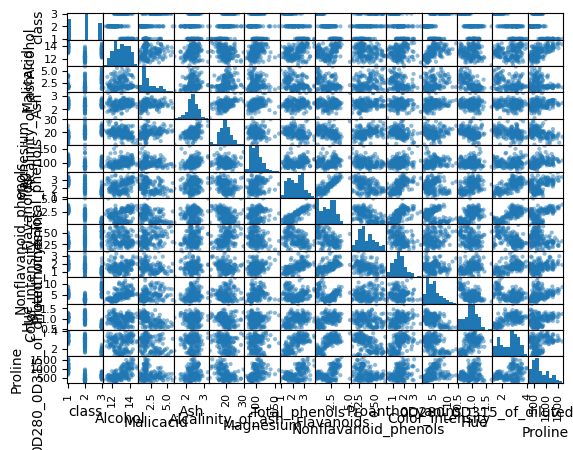

In [ ]:
import pandas
from pandas.plotting import scatter_matrix

scatter_matrix(dataset_wine)
plt.show()

- Evaluasi algoritma KNN, NB, dan SVM


In [ ]:
from sklearn.model_selection import train_test_split
array = dataset_wine.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7

# Use train_test_split directly, not through model_selection
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [ ]:
scoring = 'accuracy'

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder

# Spot Check Algorithms
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluasi untuk setiap model
results = []
names = []

for name, model in models:
  # Set shuffle=True pada KFold
  kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)

  # Buat objek  LabelEncoder, LabelEncoder digunakan untuk mengubah data yang kategorikal menjadi data numerik
  encoder = LabelEncoder()

  #  ubah variable menjadi data numerik
  Y_train_encoded = encoder.fit_transform(Y_train)

  cv_results = model_selection.cross_val_score(model, X_train, Y_train_encoded, cv=kfold, scoring=scoring)

  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())

  print(msg)

KNN: 0.070952 (0.045198)
NB: 0.091429 (0.105877)
SVM: 0.028095 (0.034434)


Naive Bayes paling efektif, uji keakuratan model NB terhadap data


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score  # Import accuracy_score
from sklearn.metrics import confusion_matrix # Import confusion_matrix
from sklearn.metrics import classification_report # Import classification_report
from sklearn.preprocessing import LabelEncoder

nb = GaussianNB()

# buat objek LabelEncoder
encoder = LabelEncoder()

# Ubah variabel target (Y_train & Y_validation) menjadi data numerik
all_y_data = np.concatenate([Y_train, Y_validation])
encoded_all_y_data = encoder.fit_transform(all_y_data)

# Split data back menjadi set training dan validation
Y_train_encoded = encoded_all_y_data[:len(Y_train)]
Y_validation_encoded = encoded_all_y_data[len(Y_train):]


nb.fit(X_train, Y_train_encoded)  # Train the model
predictions = nb.predict(X_validation)

# evaluasi model
print(accuracy_score(Y_validation_encoded, predictions))
print(confusion_matrix(Y_validation_encoded, predictions))
print(classification_report(Y_validation_encoded, predictions))

0.05555555555555555
[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 2 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_